# Simple plots

Prerequisites:

* types
* functions
* containers
* numpy 


##  Plotting a simple mathematical function

Graphical representations of data are ubiqutious across all sciences, and python gives us convenient tools to build these. `matplotlib` is an accessible and ubiqutous plotting module. We'll begin by using the `matplotlib.pyplot.plot()` function to plot the mathematical function $\mathrm{e}^x$.

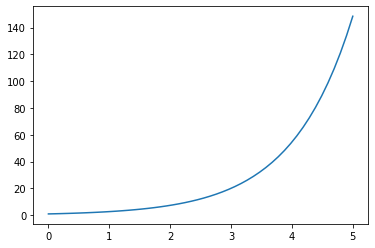

In [6]:
import numpy as np # just as numpy is often imported as 'np' ...
import matplotlib.pyplot as plt # ... this is the 'standard' way of importing matplotlib.pyplot

x = np.linspace(0,5)  # generate a numpy array, this is 'x'
y = np.exp(x)         # take the exponential of that array, this is 'y'

plt.plot(x,y) # plot our graph
plt.show()    # plt.show() declares we are finished plotting our graph, and that it should be displayed

To go through the logic of what we did above, after generating the `x` and `y` data using the already familiar `numpy` package, the `plt.plot()` function allows us to visualise their relationship taking the data as two arguments. The arguments are positional, your `x` data should always preceed you `y` data. 

While the plotting process was straightforward, our graph is ultimatley incomplete, as it is unlabelled. To explore these concepts, let's turn to some more chemically relevant data. 

> #### A note on `plt.show()`
> `plt.show()` is called at the end of each cell in which we are plotting a graph. You may come to discover that this is not always strictly necessary in a Jupyter environment as the graph will often be  printed to screen regardless. Notice, however, that if it is not included, `[<matplotlib.lines.Line2D at xxxxxx]` is returned: this is the plot object, simply include `plt.show()` to prevent this. If you are writing a python script in a text editor as opposed to a Jupyter/Ipython environment without calling the `plt.show()` function, no graph will be shown. In summary, despite sometimes being unnecessary for a quick visualisation, it is good practice to always end your plots with `plt.show()`.

## Plotting chemical data

We will plot some data associated with the Arrhenius equation,  

$ k = A \mathrm{exp}\left(\dfrac{-E_a}{k_\mathrm{B} T}\right) $.

where $k$ is the rate constant, $A$ is the pre-exponential factor, $E_a$ is the activation energy, $k_\mathrm{B}$ and $T$ is temperature. This expression should be familiar from plenty of areas of chemistry, but to review the key concepts, Arrhenius plots are used to analyse the effect of temperature on the rates of chemical reactions. 

Taking the natural log of this expression gives,

$\ln(k)= -\dfrac{E_a}{k_\mathrm{B}} \dfrac{1}{T} + \ln(A) $.

This expression now describes a straight line with gradient $-\dfrac{E_a}{k_\mathrm{B}}$ and intercept  $\ln(A)$. Given some example data, and remembering that `np.log` gives the _natural_ log of each value in a numpy array, we can now make a new plot

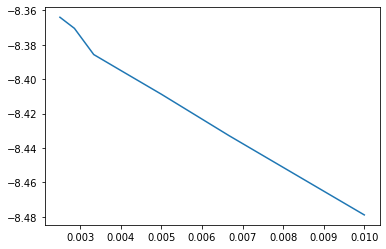

In [7]:
temperature = np.arange(100,450,50)                                                     #
k = np.array([2.078e-04,2.176e-04,2.229e-04,2.260e-04,2.281e-04,2.316e-04,2.331e-04])   # define Arrhenius data
dk = np.array([2.078e-06,2.176e-06,2.229e-06,2.260e-06,2.281e-06,2.316e-06,2.331e-06])  #

ln_k = np.log(k)                         # take the natural log of the np.array 'k'
inverse_temperature = 1/temperature      # take the inverse of the np.array 'temperature'

plt.plot(inverse_temperature, ln_k)      # plot these with inverse_temperature on the x-axis, and ln_k on the y-axis
plt.show()                               # show our plot

As above, this graph is still unsatisfactory; additions to our code will give a much improved graph. Axes labels can be set via `plt.xlabel()` and `plt.ylabel()`. The points along the graph are also discrete, and therefore to connect them with an arbitrary line is not appropriate. `plt.plot()` takes a third argument, which formats the points in your graph, the default is `-b` in otherwords, a line (`-`), that is blue (`b`). To give discrete points, we could change this default value to `og` which will give circles (`o`) that are green (`g`).

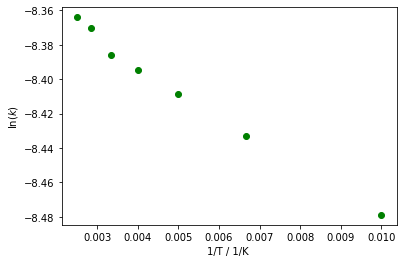

In [8]:
plt.plot(inverse_temperature, ln_k, 'og') # plot the data again, but this time using circles, 'o', that are green 'g'.
plt.xlabel('1/T / 1/K ')                  # add an x-axis label, with both the quantity (1/T) and the units (1/K)
plt.ylabel('$\ln({k})$')                  # add a y-axis label, ln(k)
plt.show()                                # show the plot

It is also possible to include error bars using the `plt.errorbar()` function. This gives the same functionality as `plt.plot()` taking additional arguments that define errorbars to plot. As there are now quite a few positional arguments in our `plt.errorbars()`, we will include them as keyword arguments. To clarify, each of these arguments are:

   + `x` - the data to be plotted on the x-axis 
   + `y` - the data to be plotted on the y-axis 
   + `yerr` the errors in `y`
   + `xerr` the errors in `x`   
   + `fmt` line formatting

We can also add a title to a plot with `plt.title()`.

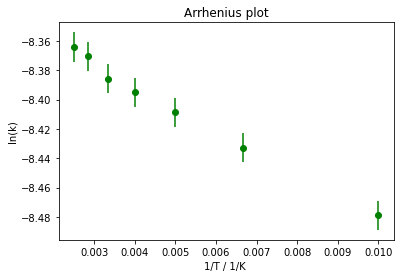

In [9]:
plt.errorbar(x=inverse_temperature, y=ln_k, yerr=dk/k, xerr=None, fmt='og') # plot graph as before, but this time inclusive of error bars
plt.xlabel('1/T / 1/K ')    # x-label as above
plt.ylabel('ln(k)')         # y-label as above
plt.title('Arrhenius plot') # add a title to our graph
plt.show()                  # show our graph

### Excercise

Using numpy functions `sin` and `linspace`, plot $\sin(x)$ where $x$ takes values from 0 to 10. Ensure you label your axes.

In [10]:
# Enter your code here

## Multiple lines on the same graph

Let's try something a little different and a little more complex. Say we want to compare the probability distribution of three atomic orbitals on the same graph, we need to call `plt.plot()` for each function, and then call `plt.show()` when we have finished adding the different functions to our plots. The radial wavefucntions, $R$, for the _hydrogenic_ $3s$, $3p$ and $3d$ orbitals respectively are

$R_{3s} = \dfrac{2}{3\sqrt3}\left(1-\dfrac{2r}{3}+\dfrac{2}{27}r^2\right)e^{-r/3}$

$R_{3p} = \dfrac{2\sqrt{2}}{9\sqrt{3}}\left(\dfrac{2r}{3}\right)\left(1-\dfrac{1}{6}r\right)e^{-r/3}$

$R_{3d} = \dfrac{1}{9\sqrt{30}}\left(\dfrac{2r}{3}\right)^2e^{-r/3}$

plotted below, they look like this



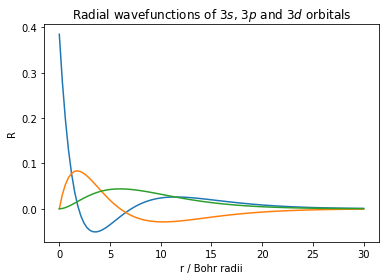

In [11]:
r_values = np.linspace(0,30,100)  # generate a series of r values which will give a smooth wavefunction

def r3s(r):
    """
    Calculates the value of the radial wavefunction of the 3s orbital for a given distance from origin
    
    Args:
        r (float): distance from origin
        
    Returns:
        (float): the value of the radial wavefunction at r
    """
    r3s = 2/(3*np.sqrt(3)) * (1 - 2*r/3 + 2/27*r**2) * np.exp(-r/3)
    return r3s

def r3p(r):
    """
    Calculates the value of the radial wavefunction of the 3p orbital for a given distance from origin
    
    Args:
        r (float): distance from origin
        
    Returns:
        (float): the value of the radial wavefunction at r
    """
    r3p = (2*np.sqrt(2))/(9*np.sqrt(3)) * ((2*r)/3) * (1 - 1/6*r) * np.exp(-r/3)
    return r3p

def r3d(r):
    """
    Calculates the value of the radial wavefunction of the 3d orbital for a given distance from origin
    
    Args:
        r (float): distance from origin
        
    Returns:
        (float): value of radial wavefunction at r
    """
    r3d = 1 /(9*np.sqrt(30)) * ( (2*r/3)**2 ) * np.exp(-r/3)
    return r3d

wavefunction_3s = r3s(r_values) # 
wavefunction_3p = r3p(r_values) # caluclate R(r) values from functions above 
wavefunction_3d = r3d(r_values) #

plt.plot(r_values, wavefunction_3s) # plot 3s wavefunction 
plt.plot(r_values, wavefunction_3p) # plot 3p wavefunction
plt.plot(r_values, wavefunction_3d) # plot 3d wavefunction
plt.xlabel('r / Bohr radii' )       # label x-axis
plt.ylabel('R')                     # label y-axis
plt.title('Radial wavefunctions of $3s$, $3p$ and $3d$ orbitals')
plt.show()                          # plt.show() only after plotting all three wavefunctions

How do we tell which line refers to which orbital? To show how to do this, and give these plots physical meaning, we can plot their radial distribution functions ($4\pi r^2 R(r)^2$). This time we add a `label` argument each time we call the `plt.plot()` function, the type of this argument must be a `string`. These labels are then shown in a _legend_, which is added to the plot by calling `plt.legend()` before calling `plt.show()`.

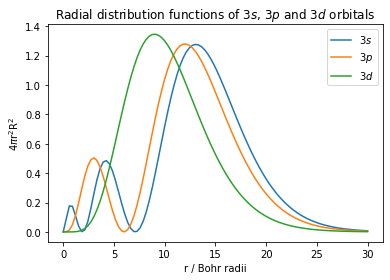

In [14]:
def radial_probablilty_function(r, wavefunction):
    """"
    Calculate the radial probability of a wavefunction at a given separation
    
    Args:
       r (float): value of wavefunction at r 
       wavefunction (float): value of the wavefunction at r
       
    returns:
       float radial probability of the wavefunction at r
    """
    return 4*np.pi*r**2*wavefunction**2 

plt.plot(r_values, radial_probablilty_function(r_values, wavefunction_3s), label = '$3s$') # plot 3s *labelled* raidial probability function
plt.plot(r_values, radial_probablilty_function(r_values, wavefunction_3p), label = '$3p$') # plot 3p *labelled* raidial probability function
plt.plot(r_values, radial_probablilty_function(r_values, wavefunction_3d), label = '$3d$') # plot 3d *labelled* raidial probability function

plt.xlabel('r / Bohr radii' )                                              # label x-axis
plt.ylabel('4$\pi$r$^2$R$^2$')                                             # label y-axis
plt.title('Radial distribution functions of $3s$, $3p$ and $3d$ orbitals') # add a title
plt.legend()                                                               # show legend
plt.show()                                                                 # plt.show() after all distributions have been plotted and show a legend

### Excercise

Given that the radial wavefunctions of the 1s and 2s orbitals are as follows:  

$ R_{1s} = 2\mathrm{e}^{-r} $   

$ R_{2s} = \dfrac{1}{2\sqrt{2}}(2-r)\mathrm{e}^{-r/2}$

plot and compare the radial distribution functions of the $1s$, $2s$ and $3s$ orbitals **on the same plot**. Ensure you label your axes, add a title, and include a legend that clarifies which function represents which orbital.

In [13]:
# Enter your code here